In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
## Import IRIS dataset
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)
X_scaled



In [ ]:
## Apply the PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(X_scaled)  #this will convert 4 dimension into 2
# pca_scaled
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)
# apply color according to categories of flowers


sc.linkage() → Computes the hierarchy of clusters.

method='ward' → Minimizes variance within clusters.

sc.dendrogram() → Creates a tree structure to decide the number of clusters

So, the linkage creates the tree structure, and the dendrogram is a tool to visualize and interpret the results of that clustering process.

Text(0, 0.5, 'Eucledian Distance')

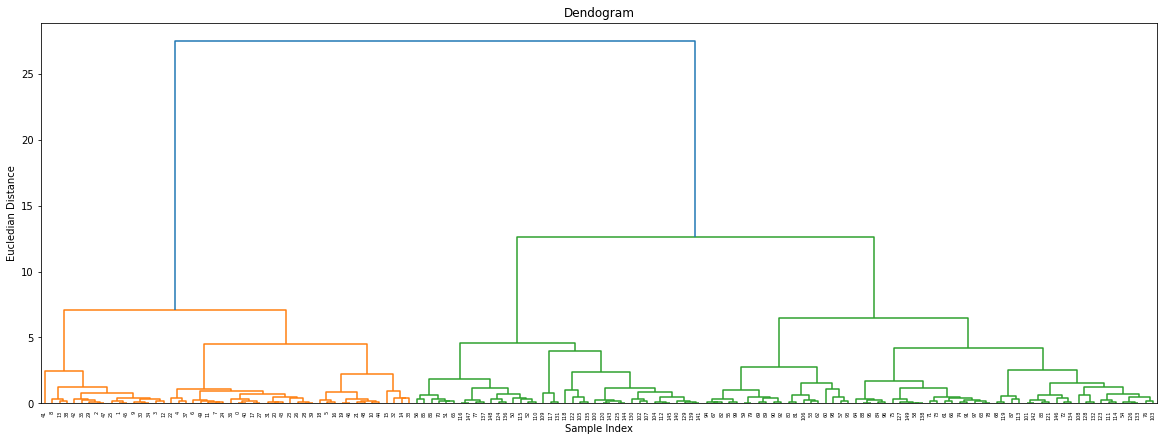

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In your case, AgglomerativeClustering doesn't alter the data itself; it only groups the data into clusters based on the distance metric (affinity), 

so fit is the correct method to use.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

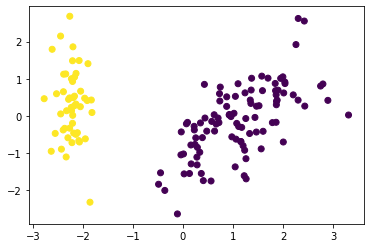

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [ ]:
## silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

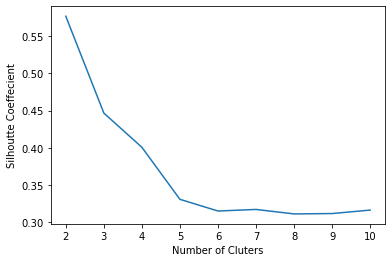

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()